# **Importações**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from numpy.fft import fft, ifft
from scipy.signal import find_peaks
from scipy import signal
from scipy.signal import argrelextrema
py.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from catboost import CatBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [3]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

# **Análise dos dispositivos**

## Microondas

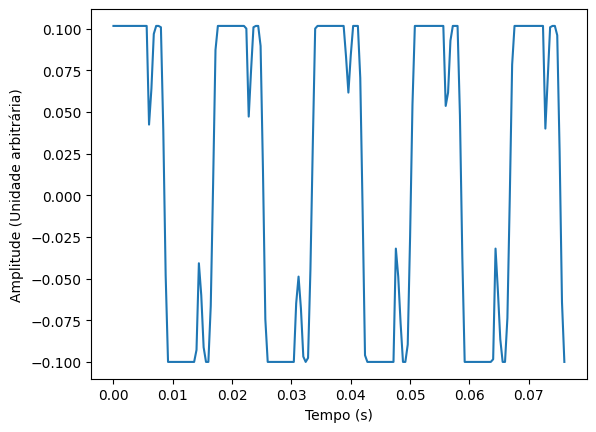

In [ ]:
w = [0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.04240,0.06400,0.09680,0.10160,0.10160,0.10080,0.03920,-0.04800,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.09280,-0.04080,-0.06000,-0.09120,-0.10000,-0.10000,-0.06640,0.00720,0.08720,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10000,0.04720,0.07520,0.10080,0.10160,0.10160,0.08960,0.01520,-0.07440,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.06480,-0.04880,-0.06800,-0.09680,-0.10000,-0.09760,-0.04480,0.03040,0.10000,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.08320,0.06160,0.08400,0.10160,0.10160,0.10160,0.07040,-0.00960,-0.09600,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.03200,-0.04880,-0.07680,-0.10000,-0.10000,-0.08960,-0.02480,0.05440,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.05360,0.06160,0.09280,0.10160,0.10160,0.10160,0.04800,-0.03680,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.10000,-0.09840,-0.03200,-0.05760,-0.08640,-0.10000,-0.10000,-0.07360,-0.00160,0.07840,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.10160,0.04000,0.07040,0.10080,0.10160,0.10160,0.09600,0.02640,-0.06400,-0.10000]
N = len(w)
fs = 2500

T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (Unidade arbitrária)')
plt.plot(x, y)

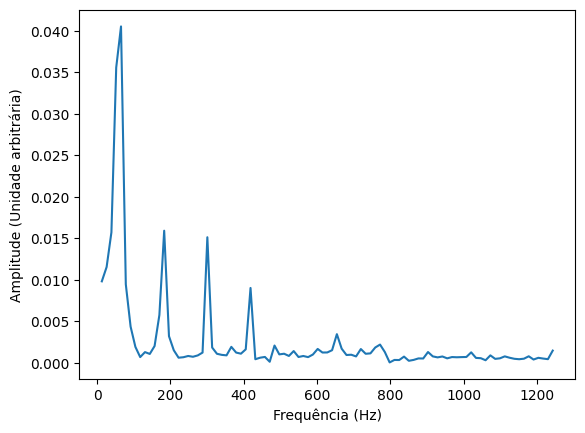

In [ ]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (Unidade arbitrária)')
plt.plot(xf, yf)

<Axes: xlabel='Frequência (Hz)'>

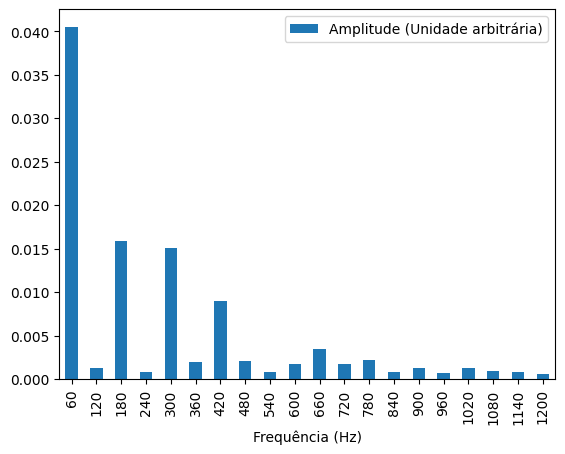

In [ ]:
# captura os picos
max_ind = argrelextrema(yf, np.greater)
pxf = xf[max_ind]
pyf = yf[max_ind]

# armazena as amplitudes das freuquencias harmonicas
ampH1 = np.zeros(20)
for freq, amp in zip(pxf, pyf):
  i = int(np.around(freq/60))
  if(i <= 20):
    ampH1[i-1] = amp
ampH1

df = pd.DataFrame({
    'Frequência (Hz)': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Amplitude (Unidade arbitrária)': ampH1
})
df.plot(x="Frequência (Hz)", y="Amplitude (Unidade arbitrária)", kind="bar")

## Ar condicionado

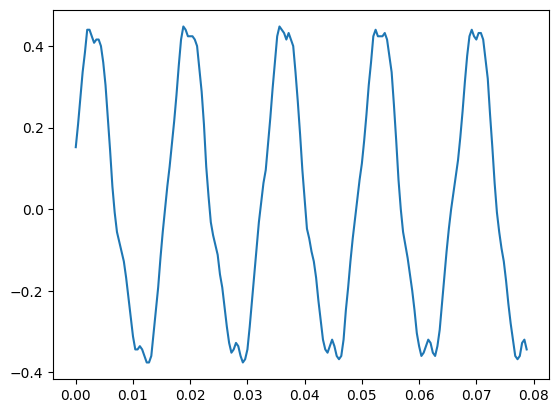

In [ ]:
w = [0.15200,0.20800,0.27200,0.33600,0.38400,0.44000,0.44000,0.42400,0.40800,0.41600,0.41600,0.40000,0.36000,0.30400,0.22400,0.14400,0.05600,-0.00800,-0.05600,-0.08000,-0.10400,-0.12800,-0.16800,-0.21600,-0.26400,-0.31200,-0.34400,-0.34400,-0.33600,-0.34400,-0.36000,-0.37600,-0.37600,-0.36000,-0.30400,-0.24800,-0.19200,-0.12000,-0.05600,0.00,0.05600,0.10400,0.16000,0.21600,0.28000,0.35200,0.41600,0.44800,0.44000,0.42400,0.42400,0.42400,0.41600,0.40000,0.34400,0.28800,0.20800,0.10400,0.03200,-0.03200,-0.06400,-0.08800,-0.11200,-0.16000,-0.19200,-0.24000,-0.28800,-0.32800,-0.35200,-0.34400,-0.32800,-0.33600,-0.36000,-0.37600,-0.36800,-0.34400,-0.28800,-0.22400,-0.16000,-0.09600,-0.03200,0.01600,0.06400,0.09600,0.16000,0.22400,0.29600,0.36000,0.42400,0.44800,0.44000,0.43200,0.41600,0.43200,0.41600,0.40000,0.33600,0.26400,0.18400,0.09600,0.02400,-0.04800,-0.07200,-0.10400,-0.12800,-0.16800,-0.22400,-0.27200,-0.32000,-0.34400,-0.35200,-0.33600,-0.32000,-0.33600,-0.36000,-0.36800,-0.36000,-0.32000,-0.24800,-0.19200,-0.12800,-0.07200,-0.02400,0.02400,0.07200,0.11200,0.16800,0.23200,0.30400,0.36000,0.42400,0.44000,0.42400,0.42400,0.42400,0.43200,0.41600,0.37600,0.33600,0.25600,0.16800,0.07200,0.00,-0.05600,-0.08800,-0.12000,-0.16000,-0.20000,-0.24800,-0.30400,-0.33600,-0.36000,-0.35200,-0.33600,-0.32000,-0.32800,-0.35200,-0.36000,-0.33600,-0.29600,-0.23200,-0.16800,-0.10400,-0.04800,0.00,0.04000,0.08000,0.12000,0.17600,0.24000,0.31200,0.37600,0.42400,0.44000,0.42400,0.41600,0.43200,0.43200,0.41600,0.36800,0.32000,0.23200,0.15200,0.06400,-0.00800,-0.05600,-0.09600,-0.12800,-0.17600,-0.23200,-0.28000,-0.32000,-0.36000,-0.36800,-0.36000,-0.32800,-0.32000,-0.34400]
N = len(w)
fs = 2500

T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.plot(x, y)

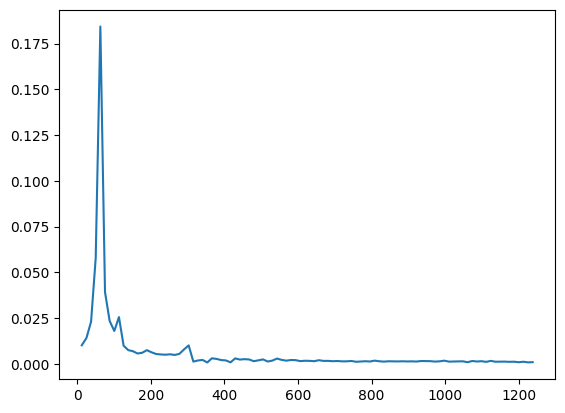

In [ ]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.plot(xf, yf)

<Axes: xlabel='Freq'>

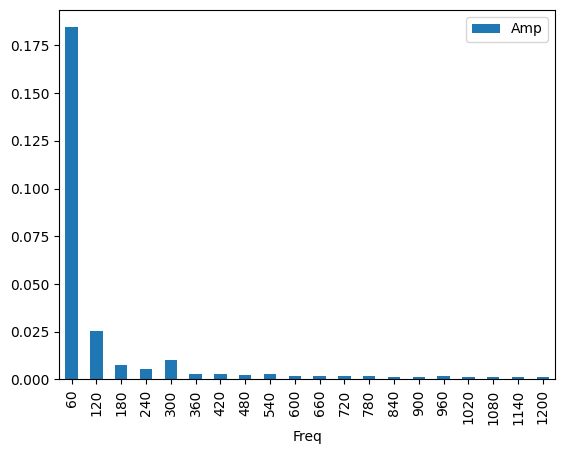

In [ ]:
# captura os picos
max_ind = argrelextrema(yf, np.greater)
pxf = xf[max_ind]
pyf = yf[max_ind]

# armazena as amplitudes das freuquencias harmonicas
ampH2 = np.zeros(20)
for freq, amp in zip(pxf, pyf):
  i = int(np.around(freq/60))
  if(i <= 20):
    ampH2[i-1] = amp
ampH2

df = pd.DataFrame({
    'Freq': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Amp': ampH2
})
df.plot(x="Freq", y="Amp", kind="bar")

## Geladeira

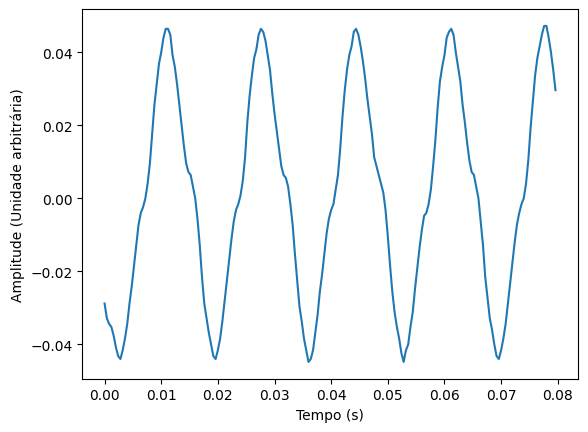

In [4]:
w = [-0.02880,-0.03280,-0.03440,-0.03520,-0.03760,-0.04080,-0.04320,-0.04400,-0.04160,-0.03840,-0.03440,-0.02880,-0.02400,-0.01840,-0.01280,-0.00720,-0.00400,-0.00240,0.00,0.00400,0.00960,0.01760,0.02560,0.03120,0.03680,0.04000,0.04400,0.04640,0.04640,0.04480,0.03920,0.03600,0.03120,0.02560,0.02000,0.01440,0.00960,0.00720,0.00640,0.00320,0.00,-0.00560,-0.01280,-0.02160,-0.02880,-0.03280,-0.03680,-0.04000,-0.04320,-0.04400,-0.04160,-0.03840,-0.03360,-0.02800,-0.02240,-0.01680,-0.01120,-0.00640,-0.00320,-0.00160,0.00080,0.00480,0.01120,0.02080,0.02800,0.03360,0.03840,0.04080,0.04480,0.04640,0.04560,0.04320,0.03920,0.03520,0.02880,0.02320,0.01840,0.01360,0.00880,0.00640,0.00560,0.00320,-0.00160,-0.00720,-0.01520,-0.02240,-0.02960,-0.03360,-0.03840,-0.04160,-0.04480,-0.04400,-0.04160,-0.03680,-0.03200,-0.02560,-0.02080,-0.01520,-0.00960,-0.00560,-0.00320,-0.00160,0.00240,0.00640,0.01360,0.02240,0.02960,0.03520,0.03920,0.04160,0.04560,0.04640,0.04480,0.04160,0.03760,0.03280,0.02720,0.02240,0.01760,0.01120,0.00880,0.00640,0.00400,0.00160,-0.00320,-0.01040,-0.01840,-0.02560,-0.03120,-0.03520,-0.03840,-0.04240,-0.04480,-0.04160,-0.04000,-0.03520,-0.03120,-0.02480,-0.01920,-0.01360,-0.00880,-0.00480,-0.00400,-0.00160,0.00240,0.00880,0.01600,0.02480,0.03200,0.03600,0.03920,0.04400,0.04560,0.04640,0.04480,0.04000,0.03600,0.03200,0.02560,0.02080,0.01520,0.01040,0.00720,0.00640,0.00320,0.00,-0.00640,-0.01280,-0.02160,-0.02720,-0.03280,-0.03600,-0.04000,-0.04320,-0.04400,-0.04160,-0.03840,-0.03440,-0.02880,-0.02320,-0.01760,-0.01200,-0.00720,-0.00400,-0.00160,0.00,0.00400,0.01040,0.01920,0.02640,0.03360,0.03840,0.04160,0.04480,0.04720,0.04720,0.04400,0.04000,0.03520,0.02960]
N = len(w)
fs = 2500

T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (Unidade arbitrária)')
plt.plot(x, y)

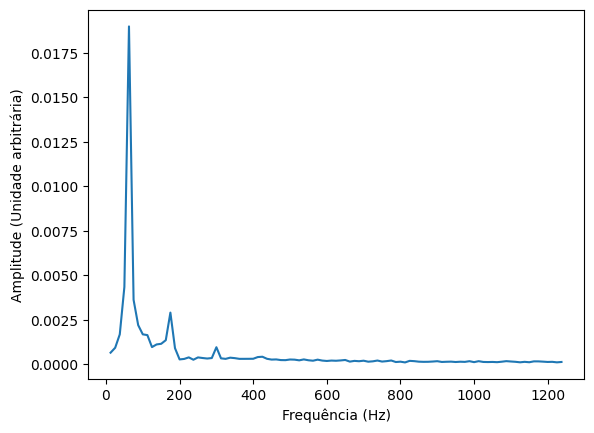

In [5]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (Unidade arbitrária)')
plt.plot(xf, yf)

<Axes: xlabel='Frequência (Hz)'>

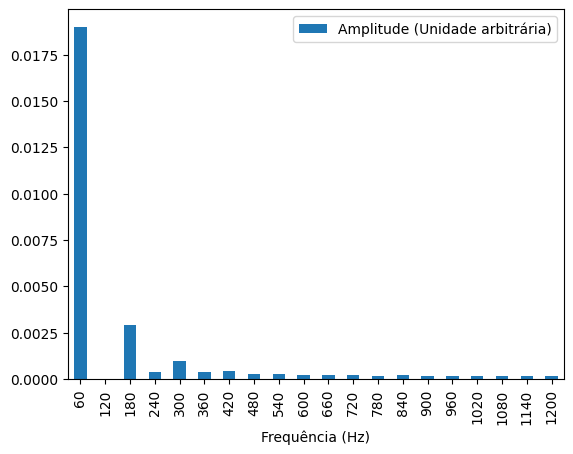

In [ ]:
# captura os picos
max_ind = argrelextrema(yf, np.greater)
pxf = xf[max_ind]
pyf = yf[max_ind]

# armazena as amplitudes das freuquencias harmonicas
ampH3 = np.zeros(20)
for freq, amp in zip(pxf, pyf):
  i = int(np.around(freq/60))
  if(i <= 20):
    ampH3[i-1] = amp
ampH3

df = pd.DataFrame({
    'Frequência (Hz)': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Amplitude (Unidade arbitrária)': ampH3
})
df.plot(x="Frequência (Hz)", y="Amplitude (Unidade arbitrária)", kind="bar")

## Monitor

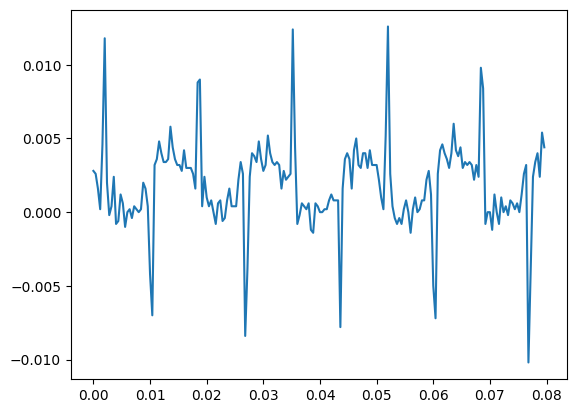

In [ ]:
w = [0.00280,0.00260,0.00160,0.00020,0.00460,0.01180,0.00200,-0.00020,0.00040,0.00240,-0.00080,-0.00060,0.00120,0.00060,-0.00100,0.00,0.00020,-0.00040,0.00040,0.00020,0.00,0.00020,0.00200,0.00160,0.00040,-0.00420,-0.00700,0.00320,0.00360,0.00480,0.00400,0.00340,0.00340,0.00360,0.00580,0.00440,0.00360,0.00320,0.00320,0.00280,0.00420,0.00300,0.00300,0.00300,0.00260,0.00160,0.00880,0.00900,0.00040,0.00240,0.00100,0.00040,0.00080,0.00,-0.00080,0.00060,0.00080,-0.00060,-0.00040,0.00080,0.00160,0.00040,0.00040,0.00040,0.00220,0.00340,0.00260,-0.00840,-0.00380,0.00240,0.00400,0.00380,0.00340,0.00480,0.00360,0.00280,0.00320,0.00520,0.00400,0.00340,0.00320,0.00340,0.00320,0.00160,0.00280,0.00220,0.00240,0.00260,0.01240,0.00440,-0.00080,-0.00020,0.00060,0.00040,0.00020,0.00060,-0.00120,-0.00140,0.00060,0.00040,0.00,0.00,0.00020,0.00020,0.00080,0.00120,0.00080,0.00080,0.00080,-0.00780,0.00160,0.00360,0.00400,0.00360,0.00160,0.00420,0.00500,0.00320,0.00300,0.00400,0.00400,0.00300,0.00420,0.00320,0.00320,0.00320,0.00220,0.00100,0.00020,0.00520,0.01260,0.00260,0.00040,-0.00040,-0.00080,-0.00040,-0.00080,0.00020,0.00080,0.00,-0.00140,0.00020,0.00100,0.00,0.00020,0.00080,0.00080,0.00220,0.00280,0.00120,-0.00500,-0.00720,0.00260,0.00420,0.00460,0.00400,0.00360,0.00300,0.00400,0.00600,0.00420,0.00380,0.00440,0.00300,0.00340,0.00320,0.00340,0.00320,0.00220,0.00320,0.00240,0.00980,0.00840,-0.00080,0.00,0.00,-0.00120,0.00120,0.00,-0.00080,0.00100,0.00,0.00040,-0.00020,0.00080,0.00060,0.00020,0.00060,0.00,0.00120,0.00260,0.00320,-0.01020,-0.00400,0.00240,0.00340,0.00400,0.00240,0.00540,0.00440]
N = len(w)
fs = 2500

T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.plot(x, y)

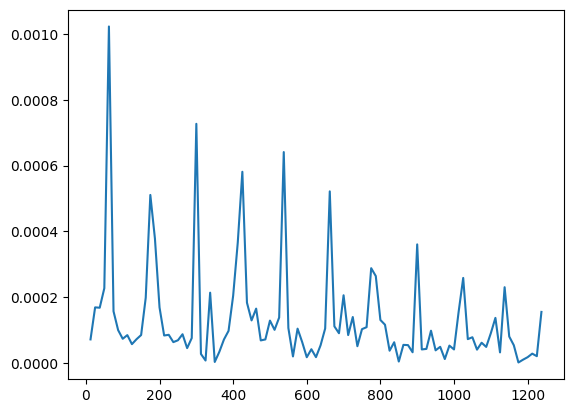

In [ ]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.plot(xf, yf)

<Axes: xlabel='Freq'>

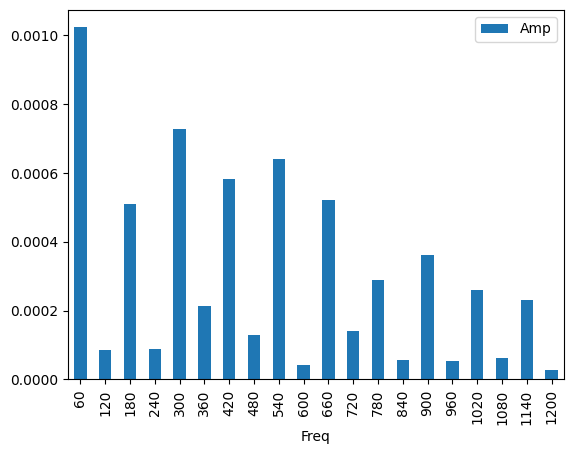

In [ ]:
# captura os picos
max_ind = argrelextrema(yf, np.greater)
pxf = xf[max_ind]
pyf = yf[max_ind]

# armazena as amplitudes das freuquencias harmonicas
ampH4 = np.zeros(20)
for freq, amp in zip(pxf, pyf):
  i = int(np.around(freq/60))
  if(i <= 20):
    ampH4[i-1] = amp
ampH4

df = pd.DataFrame({
    'Freq': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Amp': ampH4
})
df.plot(x="Freq", y="Amp", kind="bar")

## Ventilador

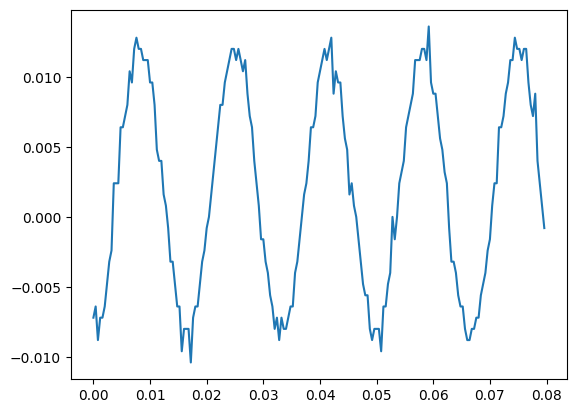

In [ ]:
w = [-0.00720,-0.00640,-0.00880,-0.00720,-0.00720,-0.00640,-0.00480,-0.00320,-0.00240,0.00240,0.00240,0.00240,0.00640,0.00640,0.00720,0.00800,0.01040,0.00960,0.01200,0.01280,0.01200,0.01200,0.01120,0.01120,0.01120,0.00960,0.00960,0.00800,0.00480,0.00400,0.00400,0.00160,0.00080,-0.00080,-0.00320,-0.00320,-0.00480,-0.00640,-0.00640,-0.00960,-0.00800,-0.00800,-0.00800,-0.01040,-0.00720,-0.00640,-0.00640,-0.00480,-0.00320,-0.00240,-0.00080,0.00,0.00160,0.00320,0.00480,0.00640,0.00800,0.00800,0.00960,0.01040,0.01120,0.01200,0.01200,0.01120,0.01200,0.01120,0.01040,0.01120,0.00880,0.00720,0.00640,0.00400,0.00240,0.00080,-0.00160,-0.00160,-0.00320,-0.00400,-0.00560,-0.00640,-0.00800,-0.00720,-0.00880,-0.00720,-0.00800,-0.00800,-0.00720,-0.00640,-0.00640,-0.00400,-0.00320,-0.00160,0.00,0.00160,0.00240,0.00400,0.00640,0.00640,0.00720,0.00960,0.01040,0.01120,0.01200,0.01120,0.01200,0.01280,0.00880,0.01040,0.00960,0.00960,0.00720,0.00560,0.00480,0.00160,0.00240,0.00080,0.00,-0.00160,-0.00320,-0.00480,-0.00560,-0.00560,-0.00800,-0.00880,-0.00800,-0.00800,-0.00800,-0.00960,-0.00640,-0.00640,-0.00480,-0.00400,0.00,-0.00160,0.00,0.00240,0.00320,0.00400,0.00640,0.00720,0.00800,0.00880,0.01120,0.01120,0.01120,0.01200,0.01200,0.01120,0.01360,0.00960,0.00880,0.00880,0.00720,0.00560,0.00480,0.00320,0.00240,-0.00080,-0.00320,-0.00320,-0.00400,-0.00560,-0.00640,-0.00640,-0.00800,-0.00880,-0.00880,-0.00800,-0.00800,-0.00720,-0.00720,-0.00560,-0.00480,-0.00400,-0.00240,-0.00160,0.00080,0.00240,0.00240,0.00640,0.00640,0.00720,0.00880,0.00960,0.01120,0.01120,0.01280,0.01200,0.01200,0.01120,0.01200,0.01200,0.00960,0.00800,0.00720,0.00880,0.00400,0.00240,0.00080,-0.00080]
N = len(w)
fs = 2500

T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.plot(x, y)

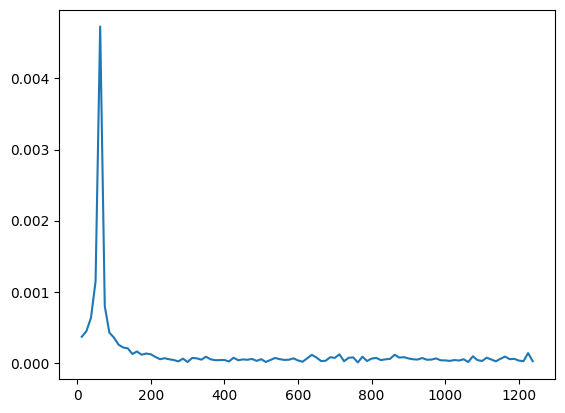

In [ ]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.plot(xf, yf)

<Axes: xlabel='Freq'>

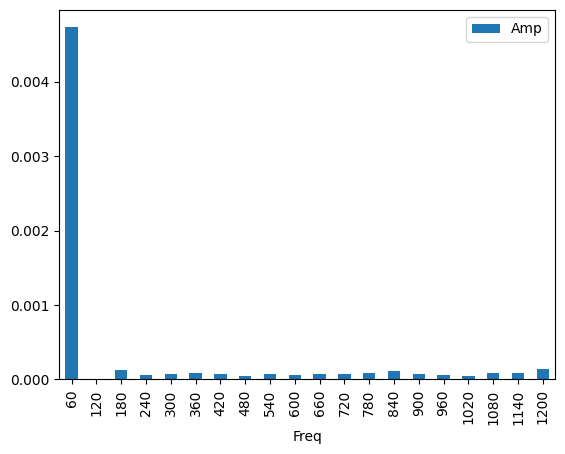

In [ ]:
# captura os picos
max_ind = argrelextrema(yf, np.greater)
pxf = xf[max_ind]
pyf = yf[max_ind]

# armazena as amplitudes das freuquencias harmonicas
ampH5 = np.zeros(20)
for freq, amp in zip(pxf, pyf):
  i = int(np.around(freq/60))
  if(i <= 20):
    ampH5[i-1] = amp
ampH5

df = pd.DataFrame({
    'Freq': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Amp': ampH5
})
df.plot(x="Freq", y="Amp", kind="bar")

## Comparativo

Text(0, 0.5, 'Amplitude (Unidade arbitrária)')

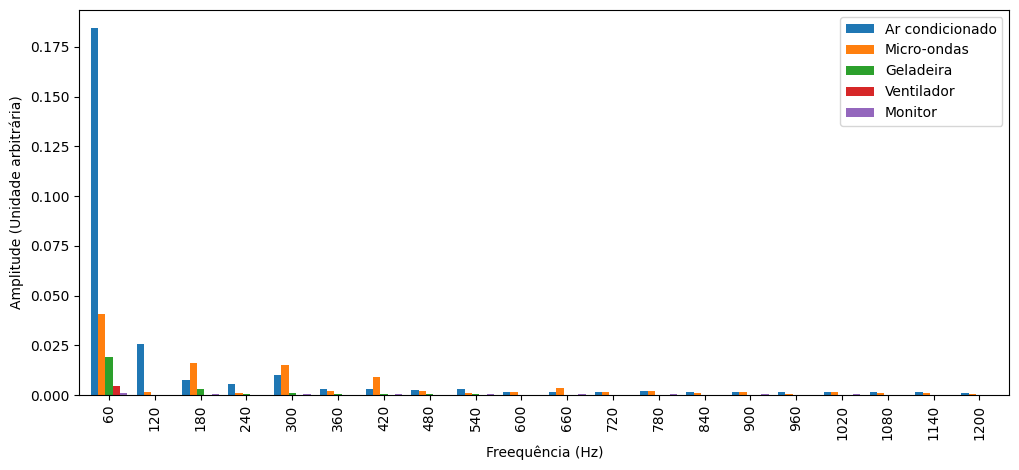

In [ ]:
df = pd.DataFrame({
    'Freequência (Hz)': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Ar condicionado': ampH2,
    'Micro-ondas': ampH1,
    'Geladeira': ampH3,
    'Ventilador': ampH5,
    'Monitor': ampH4
})
(df.plot(x="Freequência (Hz)", y=["Ar condicionado", "Micro-ondas", "Geladeira", "Ventilador", "Monitor"], kind="bar" ,width=0.8, figsize=(12, 5))).set_ylabel("Amplitude (Unidade arbitrária)")

# **Análise do Dataset (Frequencia)**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PCOMP/dataSetPCOMP.csv')
df

,f_60,f_120,f_180,f_240,f_300,f_360,f_420,f_480,f_540,f_600,...,f_720,f_780,f_840,f_900,f_960,f_1020,f_1080,f_1140,f_1200,device
0,0.050333,0.000000e+00,1.467614e-02,0.000000,1.299852e-02,0.003011,6.827211e-03,0.001199,0.000489,1.158067e-03,...,7.661253e-04,2.804903e-03,0.000000,1.115797e-03,0.000541,0.001074,4.129106e-04,0.000979,7.242021e-04,microwave
1,0.042935,0.000000e+00,2.071503e-02,0.000000,1.702037e-02,0.000000,6.085138e-03,0.001350,0.001674,2.207066e-03,...,0.000000e+00,3.827063e-03,0.000757,1.827950e-03,0.000924,0.002003,1.353241e-03,0.000000,1.370588e-03,microwave
2,0.041060,0.000000e+00,2.170987e-02,0.003339,1.414790e-02,0.002724,9.262166e-03,0.003693,0.001803,0.000000e+00,...,1.725142e-03,2.196979e-03,0.001957,8.566290e-04,0.001364,0.001421,0.000000e+00,0.001726,0.000000e+00,microwave
3,0.045386,0.000000e+00,1.424042e-02,0.000000,1.694164e-02,0.003260,8.512001e-03,0.002953,0.002747,2.879539e-03,...,1.341716e-03,2.725649e-03,0.000000,1.712378e-03,0.001216,0.001194,8.769052e-04,0.001102,1.548668e-03,microwave
4,0.050650,0.000000e+00,1.481876e-02,0.003330,1.355751e-02,0.000000,6.695595e-03,0.001534,0.000000,6.317654e-04,...,8.131323e-04,2.994829e-03,0.000000,1.151151e-03,0.000000,0.001070,0.000000e+00,0.001244,7.511724e-04,microwave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,5.206701e-18,2.122895e-18,0.000000,1.434141e-18,0.000000,1.354578e-18,0.000000,0.000000,9.532912e-19,...,6.851828e-19,6.252813e-19,0.000000,7.212127e-19,0.000000,0.000000,6.643400e-19,0.000000,5.289863e-19,fan
1996,0.000000,5.206701e-18,2.122895e-18,0.000000,1.434141e-18,0.000000,1.354578e-18,0.000000,0.000000,9.532912e-19,...,6.851828e-19,6.252813e-19,0.000000,7.212127e-19,0.000000,0.000000,6.643400e-19,0.000000,5.289863e-19,fan
1997,0.000000,5.206701e-18,2.122895e-18,0.000000,1.434141e-18,0.000000,1.354578e-18,0.000000,0.000000,9.532912e-19,...,6.851828e-19,6.252813e-19,0.000000,7.212127e-19,0.000000,0.000000,6.643400e-19,0.000000,5.289863e-19,fan
1998,0.000000,5.206701e-18,2.122895e-18,0.000000,1.434141e-18,0.000000,1.354578e-18,0.000000,0.000000,9.532912e-19,...,6.851828e-19,6.252813e-19,0.000000,7.212127e-19,0.000000,0.000000,6.643400e-19,0.000000,5.289863e-19,fan


In [ ]:
df.shape

(2000, 21)

In [ ]:
classes = ["microwave", "airConditioner", "refrigerator", "monitor", "fan"]
X = df.drop(columns=['device'])
y = df['device'].apply(classes.index).to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
devQaunt = pd.DataFrame(df['device'].value_counts().sort_index())
devQaunt


,device
airConditioner,400
fan,400
microwave,400
monitor,400
refrigerator,400


In [ ]:
configure_plotly_browser_state()
fig = {
  "data": [
    {
      "values": devQaunt['device'].to_numpy(),
      "labels": devQaunt.index.values.tolist(),
      "domain": {"column": 0},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        #"title":"Distribuição de carros avaliados",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
print("\n\n\t\t\t\tDistribuição de dispositivos")
py.iplot(fig, filename='dev')



				Distribuição de dispositivos


# **Aplicação dos Algoritmos (Frequencia)**

## KNN

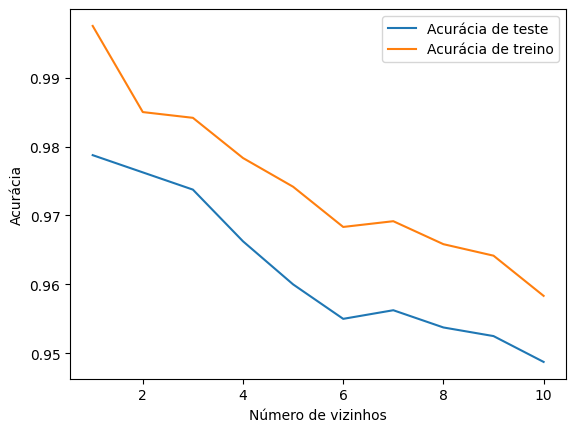

In [ ]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

#plt.title('KNN: Número variável de vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Acurácia de teste')
plt.plot(neighbors, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

## Random Forest

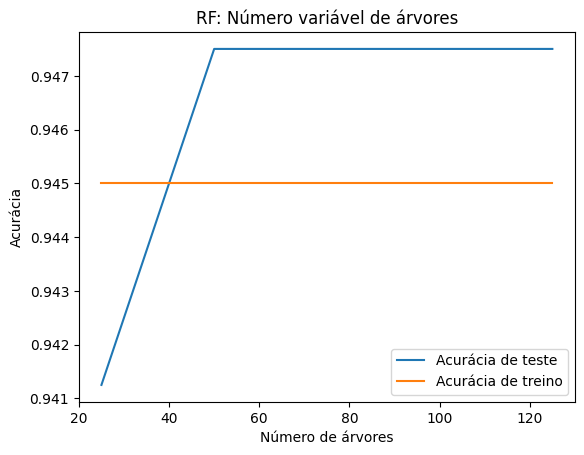

In [ ]:
n_estimators = np.arange(start=25, stop=150, step=25)
train_accuracy = np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i, k in enumerate(n_estimators):
    rf = RandomForestClassifier(n_estimators=k, random_state = 42)
    rf.fit(x_train, y_train)
    train_accuracy[i] = rf.score(x_train, y_train)
    test_accuracy[i] = rf.score(x_test, y_test)

plt.title('RF: Número variável de árvores')
plt.plot(n_estimators, test_accuracy, label = 'Acurácia de teste')
plt.plot(n_estimators, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de árvores')
plt.ylabel('Acurácia')
plt.show()

## Gradient Boosting

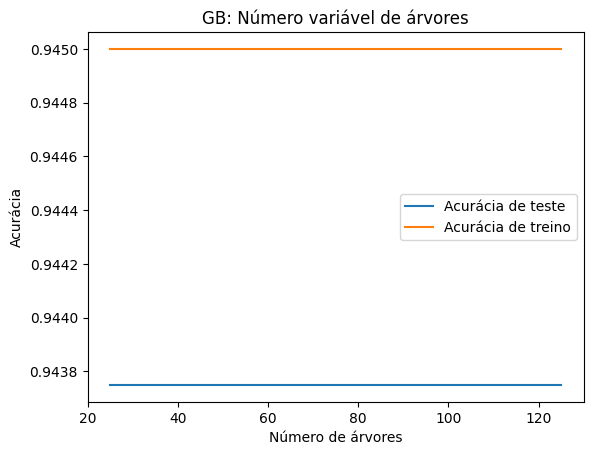

In [ ]:
n_estimators = np.arange(start=25, stop=150, step=25)
train_accuracy = np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i, k in enumerate(n_estimators):
    rf = GradientBoostingClassifier(n_estimators=k, random_state = 42)
    rf.fit(x_train, y_train)
    train_accuracy[i] = rf.score(x_train, y_train)
    test_accuracy[i] = rf.score(x_test, y_test)

plt.title('GB: Número variável de árvores')
plt.plot(n_estimators, test_accuracy, label = 'Acurácia de teste')
plt.plot(n_estimators, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de árvores')
plt.ylabel('Acurácia')
plt.show()

## MLP

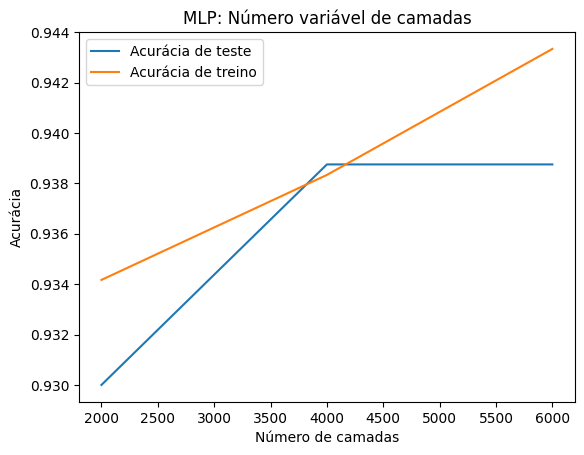

In [ ]:
hidden_layer_sizes = np.arange(start=2000, stop=6001, step=2000)
train_accuracy = np.empty(len(hidden_layer_sizes))
test_accuracy = np.empty(len(hidden_layer_sizes))

for i, k in enumerate(hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=k, random_state = 42)
    mlp.fit(x_train, y_train)
    train_accuracy[i] = mlp.score(x_train, y_train)
    test_accuracy[i] = mlp.score(x_test, y_test)

plt.title('MLP: Número variável de camadas')
plt.plot(hidden_layer_sizes, test_accuracy, label = 'Acurácia de teste')
plt.plot(hidden_layer_sizes, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de camadas')
plt.ylabel('Acurácia')
plt.show()

## Classificação

In [ ]:
clfs = [
        KNeighborsClassifier(n_neighbors = 1),
        DecisionTreeClassifier(random_state = 42),
        RandomForestClassifier(n_estimators = 100, random_state = 42),
        GradientBoostingClassifier(n_estimators=100, random_state=42),
        MLPClassifier(hidden_layer_sizes = 4000, random_state=42)
      ]
clf_labels = ['KNN', 'Decision Tree',  'Random Forest',  'Gradient Boosting', 'MLP']
i = 0
for clf, label in zip(clfs, clf_labels):
    pipe = Pipeline([(label, clf)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    if i == 0 :
      f1Score_f = np.array([f1_score(y_test,y_pred, average='macro')])
      Acc_f = np.array([accuracy_score(y_test,y_pred)])
    else:
      f1Score_f = np.append(f1Score_f, [f1_score(y_test,y_pred, average='macro')], axis=0)
      Acc_f = np.append(Acc_f, [accuracy_score(y_test,y_pred)], axis=0)
    i = i + 1

### F1 Score e Acurácia

In [ ]:
f1Score_f = pd.DataFrame(f1Score_f)
Acc_f = pd.DataFrame(Acc_f)

configure_plotly_browser_state()

trace1 = go.Bar(x = clf_labels,
                y = f1Score_f[0].to_numpy(),
                name = 'F1-score',)
trace2 = go.Bar(x = clf_labels,
                y = Acc_f[0].to_numpy(),
                name = 'Acurácia',)

data = [trace1, trace2]

py.iplot(data)

# **Grid Search (Frequencia)**

In [ ]:
pipe = Pipeline([('classifier', KNeighborsClassifier())])

search_space = [
                {
                 'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 2, 3],
                 'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                },
                {
                'classifier': [DecisionTreeClassifier(random_state = 42)],
                'classifier__criterion': ['gini', 'entropy', 'log_loss'],
                'classifier__splitter':['best', 'random']
                },
                {
                'classifier': [RandomForestClassifier(random_state = 42)],
                'classifier__criterion': ['gini', 'entropy', 'log_loss'],
                'classifier__n_estimators':[100, 150]
                },
                {
                'classifier': [GradientBoostingClassifier(random_state=42)],
                'classifier__n_estimators':[100, 150],
                'classifier__loss':['log_loss', 'deviance', 'exponential']
                },
                {
                'classifier': [MLPClassifier(random_state=42)],
                'classifier__hidden_layer_sizes': [4000],
                'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                },
              ]


In [ ]:
clf = GridSearchCV(pipe, search_space, cv=10, verbose=0, scoring = "f1_macro")
best_model = clf.fit(X, y)
print('Melhor F1-SCORE: ', best_model.best_score_)
best = best_model.best_estimator_.get_params()['classifier']
best

Melhor F1-SCORE:  0.944695546533082


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [ ]:
best.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [ ]:
best_return = best.predict(x_test)
print("F1-Score: ",f1_score(y_test, best_return, average='macro'))
print("Acurácia: ", accuracy_score(y_test,best_return))

F1-Score:  0.9787216372685531
Acurácia:  0.97875


# **Análise do Dataset (Tempo)**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PCOMP/dataSetPCOMP_time.csv')
df

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39,t_40,device
0,-0.0072,-0.0064,-0.0088,-0.0072,-0.0072,-0.0064,-0.0048,-0.0032,-0.0024,0.0024,...,0.0016,0.0008,-0.0008,-0.0032,-0.0032,-0.0048,-0.0064,-0.0064,-0.0096,fan
1,-8.0000,-8.0000,-8.0000,-0.0104,-0.0072,-0.0064,-0.0064,-0.0048,-0.0032,-0.0024,...,4.0000,0.0024,0.0008,-0.0016,-0.0016,-0.0032,-4.0000,-0.0056,-0.0064,fan
2,-8.0000,-0.0072,-0.0088,-0.0072,-8.0000,-8.0000,-0.0072,-0.0064,-0.0064,-4.0000,...,0.0056,0.0048,0.0016,0.0024,0.0008,0.0000,-0.0016,-0.0032,-0.0048,fan
3,-0.0056,-0.0056,-8.0000,-0.0088,-8.0000,-8.0000,-8.0000,-0.0096,-0.0064,-0.0064,...,0.0088,0.0072,0.0056,0.0048,0.0032,0.0024,-0.0008,-0.0032,-0.0032,fan
4,-4.0000,-0.0056,-0.0064,-0.0064,-8.0000,-0.0088,-0.0088,-8.0000,-8.0000,-0.0072,...,12.0000,0.0096,8.0000,0.0072,0.0088,4.0000,0.0024,0.0008,-0.0008,fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,...,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,airConditioner
4996,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,936.0000,752.0000,568.0000,352.0000,192.0000,...,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,airConditioner
4997,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,airConditioner
4998,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,1016.0000,airConditioner


In [ ]:
df.shape

(5000, 41)

In [ ]:
classes = ["microwave", "airConditioner", "refrigerator", "monitor", "fan"]
X = df.drop(columns=['device'])
y = df['device'].apply(classes.index).to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
devQaunt = pd.DataFrame(df['device'].value_counts().sort_index())
devQaunt


,device
airConditioner,1000
fan,1000
microwave,1000
monitor,1000
refrigerator,1000


In [ ]:
configure_plotly_browser_state()
fig = {
  "data": [
    {
      "values": devQaunt['device'].to_numpy(),
      "labels": devQaunt.index.values.tolist(),
      "domain": {"column": 0},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        #"title":"Distribuição de carros avaliados",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
print("\n\n\t\t\t\tDistribuição de dispositivos")
py.iplot(fig, filename='dev')



				Distribuição de dispositivos


# **Aplicação dos Algoritmos (Tempo)**

## KNN

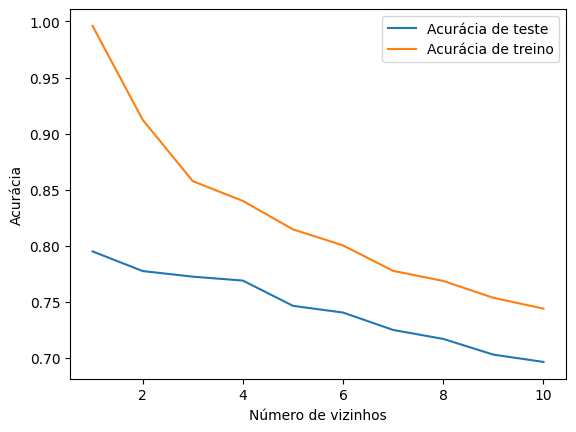

In [ ]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

#plt.title('KNN: Número variável de vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Acurácia de teste')
plt.plot(neighbors, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

## Random Forest

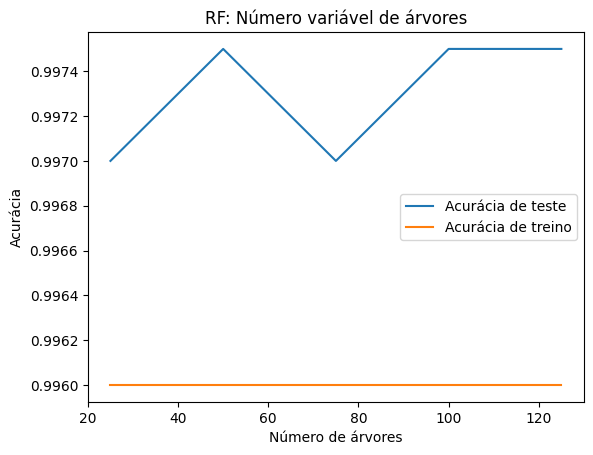

In [ ]:
n_estimators = np.arange(start=25, stop=150, step=25)
train_accuracy = np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i, k in enumerate(n_estimators):
    rf = RandomForestClassifier(n_estimators=k, random_state = 42)
    rf.fit(x_train, y_train)
    train_accuracy[i] = rf.score(x_train, y_train)
    test_accuracy[i] = rf.score(x_test, y_test)

plt.title('RF: Número variável de árvores')
plt.plot(n_estimators, test_accuracy, label = 'Acurácia de teste')
plt.plot(n_estimators, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de árvores')
plt.ylabel('Acurácia')
plt.show()

## Gradient Boosting

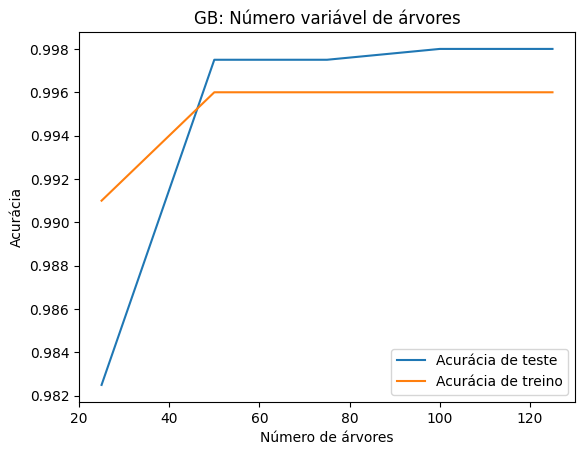

In [ ]:
n_estimators = np.arange(start=25, stop=150, step=25)
train_accuracy = np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i, k in enumerate(n_estimators):
    rf = GradientBoostingClassifier(n_estimators=k, random_state = 42)
    rf.fit(x_train, y_train)
    train_accuracy[i] = rf.score(x_train, y_train)
    test_accuracy[i] = rf.score(x_test, y_test)

plt.title('GB: Número variável de árvores')
plt.plot(n_estimators, test_accuracy, label = 'Acurácia de teste')
plt.plot(n_estimators, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de árvores')
plt.ylabel('Acurácia')
plt.show()

## MLP

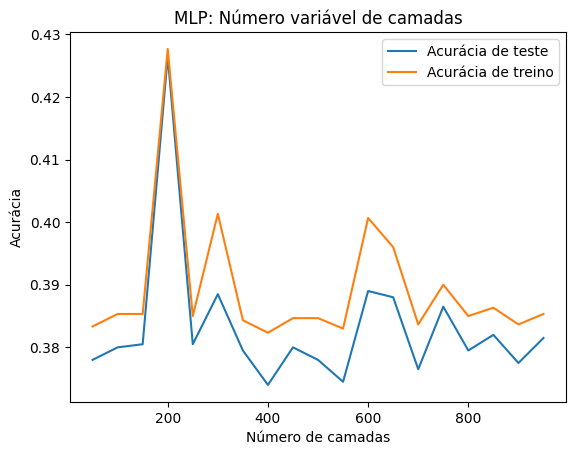

In [ ]:
hidden_layer_sizes = np.arange(start=50, stop=1000, step=50)
train_accuracy = np.empty(len(hidden_layer_sizes))
test_accuracy = np.empty(len(hidden_layer_sizes))

for i, k in enumerate(hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=k, random_state = 42)
    mlp.fit(x_train, y_train)
    train_accuracy[i] = mlp.score(x_train, y_train)
    test_accuracy[i] = mlp.score(x_test, y_test)

plt.title('MLP: Número variável de camadas')
plt.plot(hidden_layer_sizes, test_accuracy, label = 'Acurácia de teste')
plt.plot(hidden_layer_sizes, train_accuracy, label = 'Acurácia de treino')
plt.legend()
plt.xlabel('Número de camadas')
plt.ylabel('Acurácia')
plt.show()

## Classificação

In [ ]:
clfs = [
        KNeighborsClassifier(n_neighbors = 1),
        DecisionTreeClassifier(random_state = 42),
        RandomForestClassifier(n_estimators = 100, random_state = 42),
        GradientBoostingClassifier(n_estimators=100, random_state=42),
        MLPClassifier(hidden_layer_sizes = 200, random_state=42)
      ]
clf_labels = ['KNN', 'Decision Tree',  'Random Forest',  'Gradient Boosting', 'MLP']
i = 0
for clf, label in zip(clfs, clf_labels):
    pipe = Pipeline([(label, clf)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    if i == 0 :
      f1Score_t = np.array([f1_score(y_test,y_pred, average='macro')])
      Acc_t = np.array([accuracy_score(y_test,y_pred)])
    else:
      f1Score_t = np.append(f1Score_t, [f1_score(y_test,y_pred, average='macro')], axis=0)
      Acc_t = np.append(Acc_t, [accuracy_score(y_test,y_pred)], axis=0)
    i = i + 1

### F1 Score e Acurácia

In [ ]:
f1Score_t = pd.DataFrame(f1Score_t)
Acc_t = pd.DataFrame(Acc_t)

configure_plotly_browser_state()

trace1 = go.Bar(x = clf_labels,
                y = f1Score_t[0].to_numpy(),
                name = 'F1-score',)
trace2 = go.Bar(x = clf_labels,
                y = Acc_t[0].to_numpy(),
                name = 'Acurácia',)

data = [trace1,trace2]

py.iplot(data)

# **Grid Search (Tempo)**

In [ ]:
pipe = Pipeline([('classifier', KNeighborsClassifier())])

search_space = [
                {
                 'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 2, 3],
                 'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                },
                {
                'classifier': [DecisionTreeClassifier(random_state = 42)],
                'classifier__criterion': ['gini', 'entropy', 'log_loss'],
                'classifier__splitter':['best', 'random']
                },
                {
                'classifier': [RandomForestClassifier(random_state = 42)],
                'classifier__criterion': ['gini', 'entropy', 'log_loss'],
                'classifier__n_estimators':[100, 150]
                },
                {
                'classifier': [GradientBoostingClassifier(random_state=42)],
                'classifier__n_estimators':[100, 150],
                'classifier__loss':['log_loss', 'deviance', 'exponential']
                },
                {
                'classifier': [MLPClassifier(random_state=42)],
                'classifier__hidden_layer_sizes': [200],
                'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                },
              ]


In [ ]:
clf = GridSearchCV(pipe, search_space, cv=10, verbose=0, scoring = "f1_macro")
best_model = clf.fit(X, y)
print('Melhor F1-SCORE: ', best_model.best_score_)
best = best_model.best_estimator_.get_params()['classifier']
best

Melhor F1-SCORE:  0.9963793780834859


GradientBoostingClassifier(random_state=42)

In [ ]:
best.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
best_return = best.predict(x_test)
print("F1-Score: ",f1_score(y_test, best_return, average='macro'))
print("Acurácia: ", accuracy_score(y_test,best_return))

F1-Score:  0.99799994999875
Acurácia:  0.998


# **Comparação**

## F1 Score

In [ ]:
f1Score_f = pd.DataFrame(f1Score_f)
f1Score_t = pd.DataFrame(f1Score_t)

configure_plotly_browser_state()

trace1 = go.Bar(x = clf_labels,
                y = f1Score_f[0].to_numpy(),
                name = 'Frequencia',)
trace2 = go.Bar(x = clf_labels,
                y = f1Score_t[0].to_numpy(),
                name = 'Tempo',)
data = [trace1, trace2]

py.iplot(data)

## Accuracy

In [ ]:
Acc_f = pd.DataFrame(Acc_f)
Acc_t = pd.DataFrame(Acc_t)

configure_plotly_browser_state()

trace1 = go.Bar(x = clf_labels,
                y = Acc_f[0].to_numpy(),
                name = 'Frequencia',)
trace2 = go.Bar(x = clf_labels,
                y = Acc_t[0].to_numpy(),
                name = 'Tempo',)
data = [trace1, trace2]

py.iplot(data)